<a href="https://colab.research.google.com/github/haedal-uni/analysis/blob/main/%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0_%EA%B8%B0%EB%B0%98_%EB%A7%A4%EC%88%98_%EB%A7%A4%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

단기/장기 이동평균선을 비교해 매수·매도 시점을 시각화하는 전략.

전통적인 테크니컬 트레이딩 전략 코드

In [1]:
import warnings
import matplotlib
import sys
import numpy as np
import os
import pandas as pd
warnings.filterwarnings(action='ignore')
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


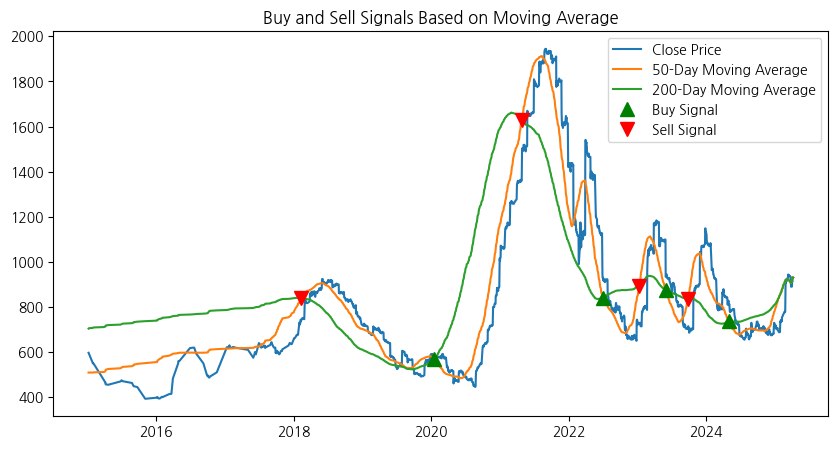

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('미국 철강 코일 선물 과거 데이터.csv', parse_dates=['날짜'], index_col="날짜", thousands=",")
df['거래량'] = df['거래량'].apply(lambda x: float(x.replace('K', '')) * 1000 if isinstance(x, str) and 'K' in x else float(x))
df['변동 %'] = df['변동 %'].apply(lambda x: float(x.replace('%', '')) / 100 if isinstance(x, str) else x)
df.dropna(inplace=True)

# 이동평균 설정
short_window = 50
long_window = 200

# 이동평균 계산
df['short_mavg'] = df['종가'].rolling(window=short_window, min_periods=1).mean()
df['long_mavg'] = df['종가'].rolling(window=long_window, min_periods=1).mean()

# 매수/매도 신호 생성
df['signal'] = 0
df['signal'][short_window:] = np.where(df['short_mavg'][short_window:] > df['long_mavg'][short_window:], 1, 0)
df['position'] = df['signal'].diff()

# 결과 출력
plt.figure(figsize=(10,5))
plt.plot(df['종가'], label='Close Price')
plt.plot(df['short_mavg'], label=f'{short_window}-Day Moving Average')
plt.plot(df['long_mavg'], label=f'{long_window}-Day Moving Average')

# 매수/매도 지점 표시
plt.plot(df[df['position'] == 1].index, df['short_mavg'][df['position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df[df['position'] == -1].index, df['short_mavg'][df['position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Buy and Sell Signals Based on Moving Average')
plt.legend(loc='best')
plt.show()
